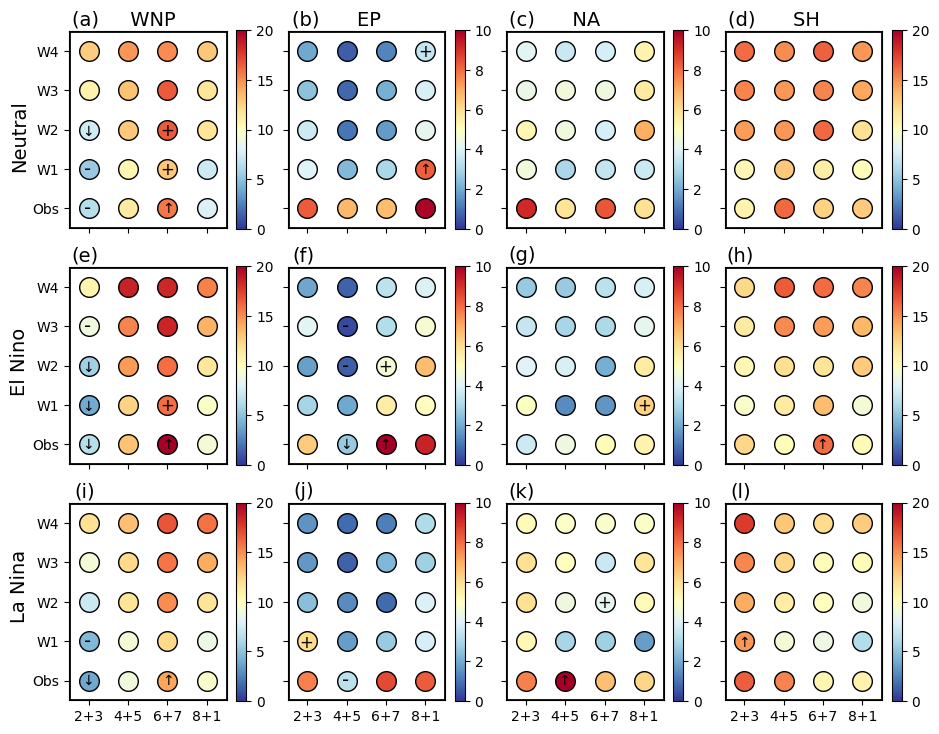

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Data_TC/Proc/MJO_with_different_phases.csv', index_col='week')

columns_to_plot = ['Nut_WP_2_3', 'Nut_WP_4_5', 'Nut_WP_6_7', 'Nut_WP_8_1']
columns_to_plot1 = ['Nut_EP_2_3', 'Nut_EP_4_5', 'Nut_EP_6_7', 'Nut_EP_8_1']
columns_to_plot2 = ['Nut_NA_2_3', 'Nut_NA_4_5', 'Nut_NA_6_7', 'Nut_NA_8_1']
columns_to_plot3 = ['Nut_SH_2_3', 'Nut_SH_4_5', 'Nut_SH_6_7', 'Nut_SH_8_1']

columns_to_plot4 = ['EN_WP_2_3', 'EN_WP_4_5', 'EN_WP_6_7', 'EN_WP_8_1']
columns_to_plot7 = ['EN_SH_2_3', 'EN_SH_4_5', 'EN_SH_6_7', 'EN_SH_8_1']
columns_to_plot5 = ['EN_EP_2_3', 'EN_EP_4_5', 'EN_EP_6_7', 'EN_EP_8_1']
columns_to_plot6 = ['EN_NA_2_3', 'EN_NA_4_5', 'EN_NA_6_7', 'EN_NA_8_1']

columns_to_plot8 = ['LN_WP_2_3', 'LN_WP_4_5', 'LN_WP_6_7', 'LN_WP_8_1']
columns_to_plot11 = ['LN_SH_2_3', 'LN_SH_4_5', 'LN_SH_6_7', 'LN_SH_8_1']
columns_to_plot9 = ['LN_EP_2_3', 'LN_EP_4_5', 'LN_EP_6_7', 'LN_EP_8_1']
columns_to_plot10 = ['LN_NA_2_3', 'LN_NA_4_5', 'LN_NA_6_7', 'LN_NA_8_1']

desired_order = ['Obs', 'week1', 'week2', 'week3', 'week4']

x_tick_labels = ['2+3', '4+5', '6+7', '8+1']
y_tick_labels = ['Obs', 'W1', 'W2', 'W3', 'W4']


box_size = 1  
dot_size = 200  

max_counts = [20, 10, 10, 20,20,10,10,20,20,10,10,20]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(11, 9), sharey=True, sharex=True, gridspec_kw={'hspace': 0.07, 'wspace': 0.11})

all_columns_to_plot = [columns_to_plot, columns_to_plot1, columns_to_plot2, columns_to_plot3, columns_to_plot4, columns_to_plot5, columns_to_plot6, columns_to_plot7, columns_to_plot8, columns_to_plot9, columns_to_plot10, columns_to_plot11]

for ax, columns, max_count in zip(axes.flatten(), all_columns_to_plot, max_counts):

    df_selected = df[columns].reindex(desired_order)

    cmap = plt.cm.RdYlBu_r

    ax.set_xlim(0, len(df_selected.columns) * box_size)
    ax.set_ylim(0, len(df_selected) * box_size)
    ax.set_aspect('equal')

    for i, (index, row) in enumerate(df_selected.iterrows()):
        for j, phase in enumerate(df_selected.columns):
            count = row[phase]

            x = j * box_size + 0.5 * box_size
            y = len(df_selected) - i - 0.5

            ax.scatter(x, y, color=cmap(count / max_count), edgecolors='black', linewidth=1, s=dot_size)

    outer_box = plt.Rectangle((0, 0), len(df_selected.columns) * box_size, len(df_selected) * box_size, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_patch(outer_box)

    ax.set_xticks([j * box_size + 0.5 * box_size for j in range(len(df_selected.columns))])
    ax.set_xticklabels(x_tick_labels)  
    ax.set_yticks([len(df_selected) - i - 0.5 for i in range(len(df_selected))])
    ax.set_yticklabels(y_tick_labels)  
    ax.invert_yaxis()

    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_count), cmap=cmap), ax=ax, orientation='vertical', pad=0.05, shrink=0.9)


    if ax == axes[0, 0]:
        ax.text(0.35, 1.06, '(a)     WNP', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.12, 0.1, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.12, 0.3, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.12, 0.49, "\N{DOWNWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.626, 0.1, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.621, 0.294, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)
        ax.text(0.621, 0.495, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)

    elif ax == axes[1, 0]:
        ax.text(0.1, 1.06, '(e)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        
        # El Nino
        ax.text(0.12, 0.1, "\N{DOWNWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.12, 0.29, "\N{DOWNWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.12, 0.49, "\N{DOWNWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.12, 0.7, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        
        ax.text(0.626, 0.1, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.621, 0.294, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)

    elif ax == axes[2, 0]:
        ax.text(0.1, 1.06, '(i)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)  
        ax.text(0.12, 0.1, "\N{DOWNWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.12, 0.3, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.626, 0.1, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        
        
    elif ax == axes[2, 1]:
        ax.text(0.1, 1.06, '(j)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)  
        
        ax.text(0.12, 0.294, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)
        ax.text(0.37, 0.1, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        
    elif ax == axes[2, 2]:
        ax.text(0.1, 1.06, '(k)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)  
        ax.text(0.621, 0.495, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)
        ax.text(0.37, 0.1, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        
        
        
    elif ax == axes[2, 3]:
        ax.text(0.1, 1.06, '(l)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14) 
        ax.text(0.12, 0.29, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)

    elif ax == axes[0, 1]:
        ax.text(0.31, 1.06, '(b)      EP', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.87, 0.294, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.874, 0.896, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)
                                
        
    elif ax == axes[1, 1]:
        ax.text(0.1, 1.06, '(f)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)  
        ax.text(0.37, 0.1, "\N{DOWNWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.37, 0.495, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.37, 0.7, "-", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        
        ax.text(0.621, 0.1, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
        ax.text(0.621, 0.495, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)
        

    elif ax == axes[1, 2]:
        ax.text(0.1, 1.06, '(g)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14) 
        ax.text(0.874, 0.294, "+", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=12)
    elif ax == axes[1, 3]:
        ax.text(0.1, 1.06, '(h)', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
        ax.text(0.621, 0.1, "\N{UPWARDS ARROW}", transform=ax.transAxes, ha='center', va='center', color='k', fontsize=10)
    
    elif ax == axes[0, 2]:
        ax.text(0.31, 1.06, '(c)      NA', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)
    elif ax == axes[0, 3]:
        ax.text(0.31, 1.06, '(d)      SH', transform=ax.transAxes, ha='center', va='center', color='k', fontsize=14)    

        
fig.text(0.08, 0.75, 'Neutral', ha='center', va='center', rotation='vertical', fontsize=14)        
fig.text(0.08, 0.5, 'El Nino', ha='center', va='center', rotation='vertical', fontsize=14) 
fig.text(0.08, 0.25, 'La Nina', ha='center', va='center', rotation='vertical', fontsize=14)    
    
plt.grid(False) 
fig.tight_layout(w_pad=0)
#plt.savefig('Figures/Figure15_ENSO_MJO_DGR.png', dpi=400, bbox_inches='tight')
plt.show()
